条形图、箱线图和点图
饼图和扇形图
直方图与核密度图

# 6.1 条形图

条形图通过垂直的或水平的条形展示了类别型变量的分布（频数）。函数barplot()的最简单用法是：

barplot(height)

height是一个向量或一个矩阵。

In [2]:
install.packages("vcd")

Installing package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpuaNf28\downloaded_packages


In [3]:
#在关节炎研究中，变量Improved记录了对美味接受了安慰剂或药物治疗的病人的治疗结果
library(vcd)
counts <- table(Arthritis$Improved) #i#使用table()函数将其表格化
counts
#可以看到，28为病人有了明显改善，14人有部分改善，而42人没有改善。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"package 'vcd' was built under R version 3.5.2"Loading required package: grid



  None   Some Marked 
    42     14     28 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

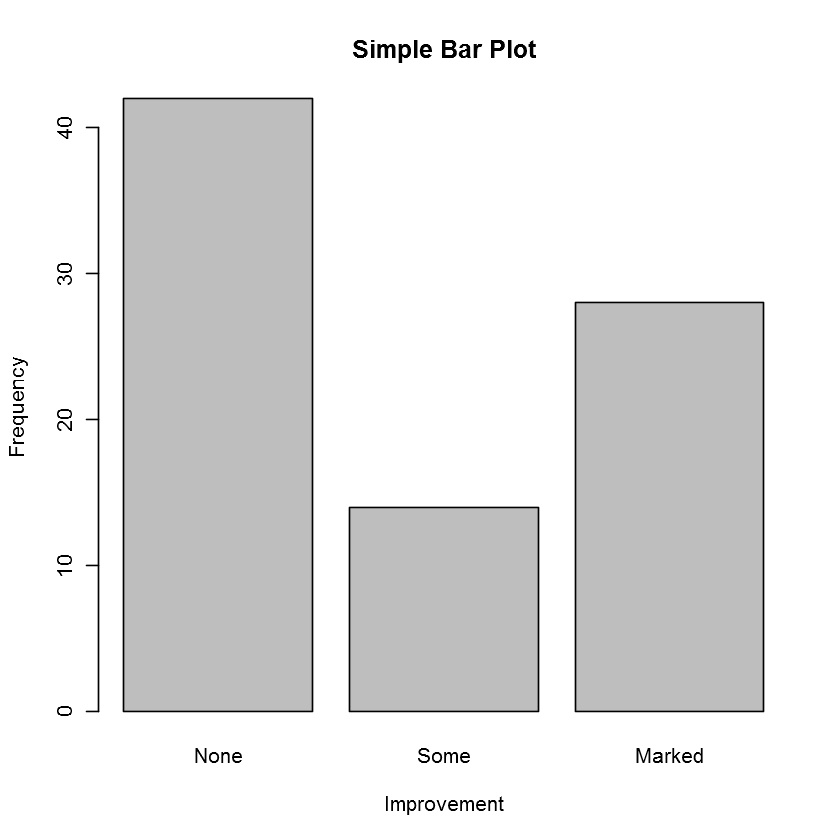

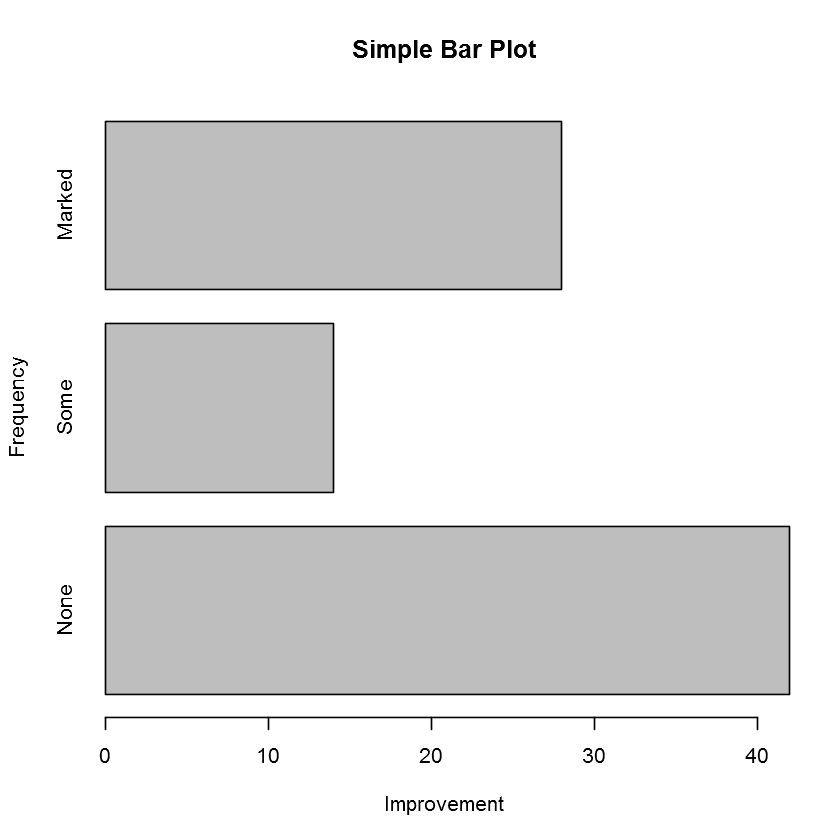

In [5]:
#简单的条形图
barplot(counts,
       main = "Simple Bar Plot",
       xlab="Improvement",
       ylab="Frequency") #简单条形图
barplot(counts,
       main = "Simple Bar Plot",
       xlab="Improvement",
       ylab="Frequency",
       horiz=TRUE) #水平条形图

![生成因素变量的条形图.jpg](./image/生成因素变量的条形图.jpg)

## 6.1.2  堆砌条形图和分组条形图

如果height是一个矩阵而不是一个向量，则绘图结果将是一幅堆砌条形图或分组条形图。若beside=FALSE（默认值），则矩阵中的每一列都将生成图中的一个条形，各列中的值将给出；堆砌的“子条”的高度。若beside=TRUE，则矩阵中的每一列都表示一个分组，各列中的值将并列而不是堆砌。

In [7]:
library(vcd)
counts <- table(Arthritis$Improved, Arthritis$Treatment)
counts

        
         Placebo Treated
  None        29      13
  Some         7       7
  Marked       7      21

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

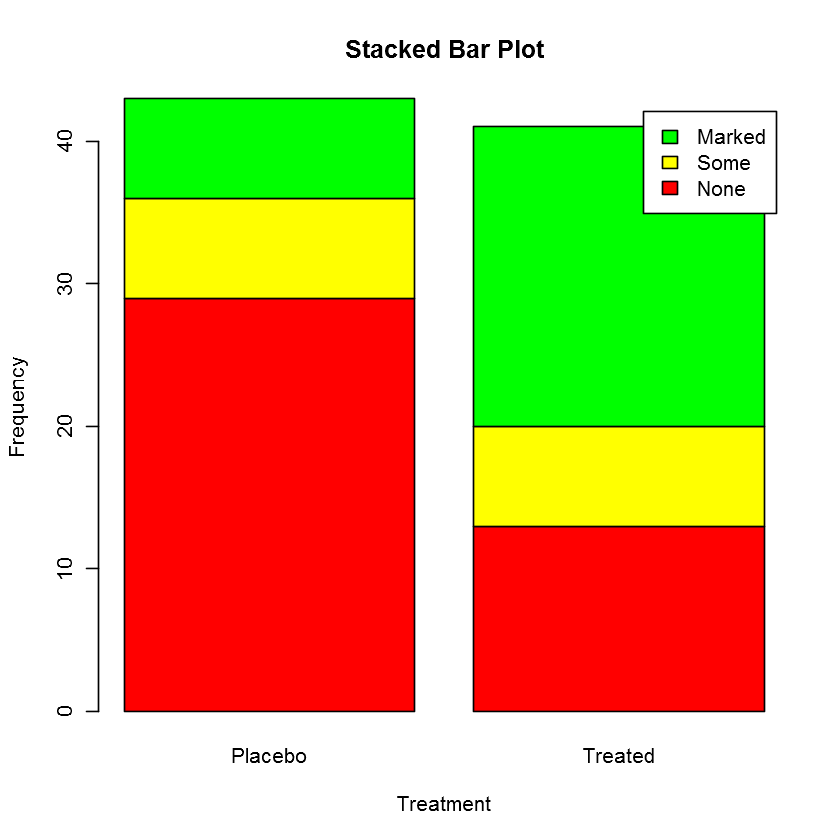

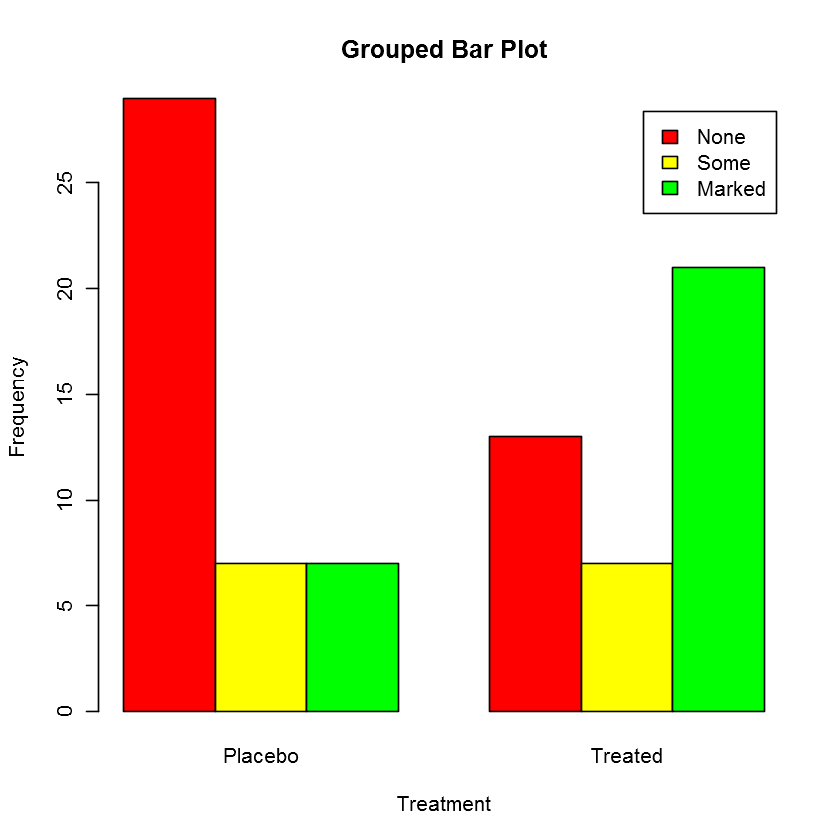

In [8]:
#堆砌条形图
barplot(counts,
        main="Stacked Bar Plot",
        xlab="Treatment", ylab="Frequency",
        col=c("red", "yellow","green"),
        legend=rownames(counts))

#分组条形图
barplot(counts,
        main="Grouped Bar Plot",
        xlab="Treatment", ylab="Frequency",
        col=c("red", "yellow", "green"),
        legend=rownames(counts), beside=TRUE)

## 6.1.3 均值条形图

条形图并不一定要基于技术数据 或频率数据。可以使用数据整合函数并将结果传递给barplot()函数，来创建表示均值、中位数、标准差等的条形图。

In [10]:
states <- data.frame(state.region, state.x77)
means <- aggregate(states$Illiteracy,by=list(state.region),FUN=mean)
means

Group.1,x
Northeast,1.000000
South,1.737500
North Central,0.700000
West,1.023077


In [11]:
means <- means[order(means$x),]  #将均值从小到大排序
means

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Group.1,x
3,North Central,0.700000
1,Northeast,1.000000
4,West,1.023077
2,South,1.737500


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

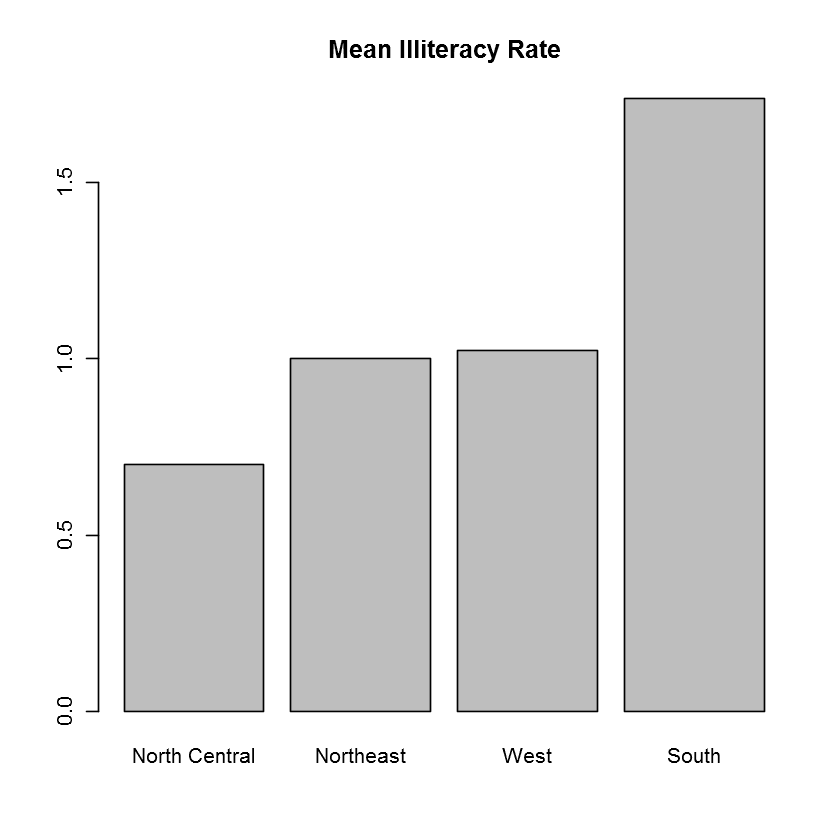

In [12]:
barplot(means$x,names.arg=means$Group.1)
title("Mean Illiteracy Rate") #添加标题

## 6.1.4 条形图的微调

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

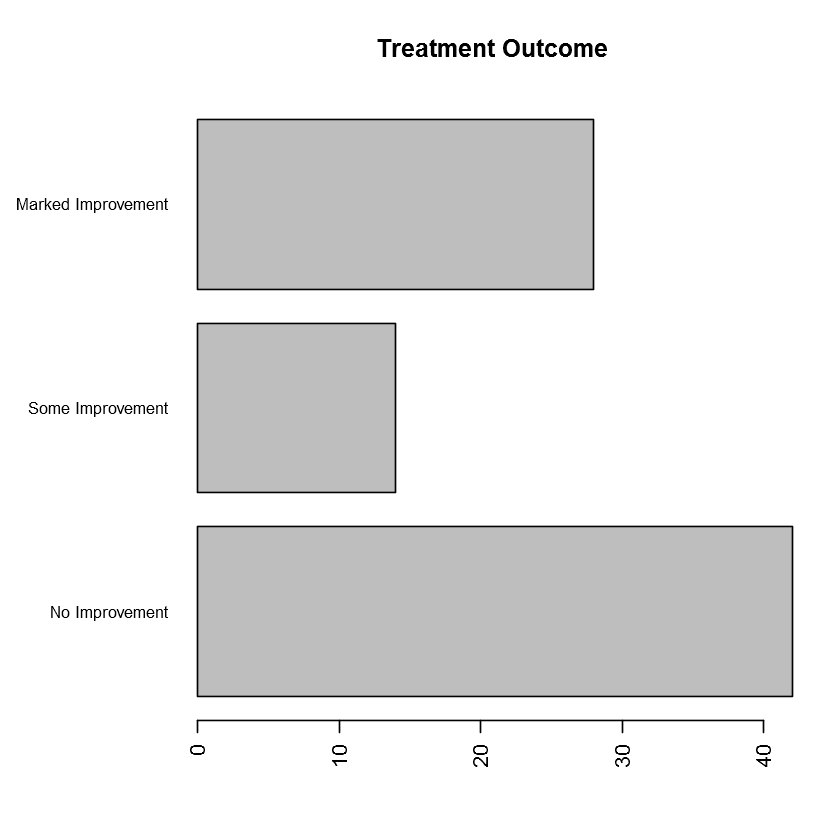

In [16]:
#为条形图搭配标签
par(mar=c(5,8,4,2)) #增加y边界的大小
par(las=2)  #旋转条形的标签
counts <- table(Arthritis$Improved)
barplot(counts,
       main = "Treatment Outcome",
       horiz = TRUE,
       cex.names = 0.8,  #缩小字体大小，让标签更合适
       names.arg=c("No Improvement", "Some Improvement",
                  "Marked Improvement"))  #修改标签文本
#par()函数能够让你对R的默认图形做出大量修改

## 6.1.5 棘状图

棘状图对堆砌条形图进行了重缩放，这样每个条形的高度均为1，每一段的高度即表示比例。

棘状图可由vcd包中的函数spine()绘制。

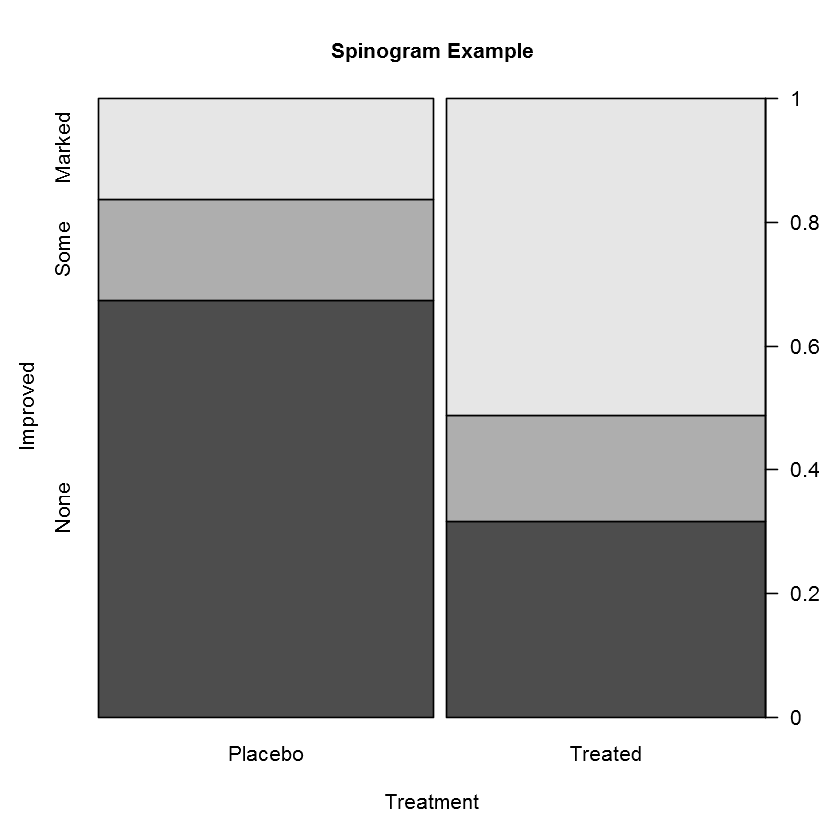

In [17]:
library(vcd)
attach(Arthritis)
counts <- table(Treatment, Improved)
spine(counts, main="Spinogram Example")
detach(Arthritis)

# 6.2 饼图

饼图可由以下函数创建：

pie(x, labels)

x是一个非负数值向量，表示每个扇形的面积，而labels则是表示各扇形标签的字符型向量。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"package 'plotrix' was built under R version 3.5.2"Warning message in text.default(1.1 * P$x, 1.1 * P$y, labels[i], xpd = TRUE, adj = ifelse(P$x < :
""mian" is not a graphical parameter"Warning message in text.default(1.1 * P$x, 1.1 * P$y, labels[i], xpd = TRUE, adj = ifelse(P$x < :
""mian" is not a graphical parameter"Warning message in text.default(1.1 * P$x, 1.1 * P$y, labels[i], xpd = TRUE, adj = ifelse(P$x < :
""mian" is not a graphical parameter"Warning message in text.default(1.1 * P$x, 1.1 * P$y, labels[i], xpd = TRUE, adj = ifelse(P$x < :
""mian" is not a graphical parameter"Warning message in title(main = main, ...):
""

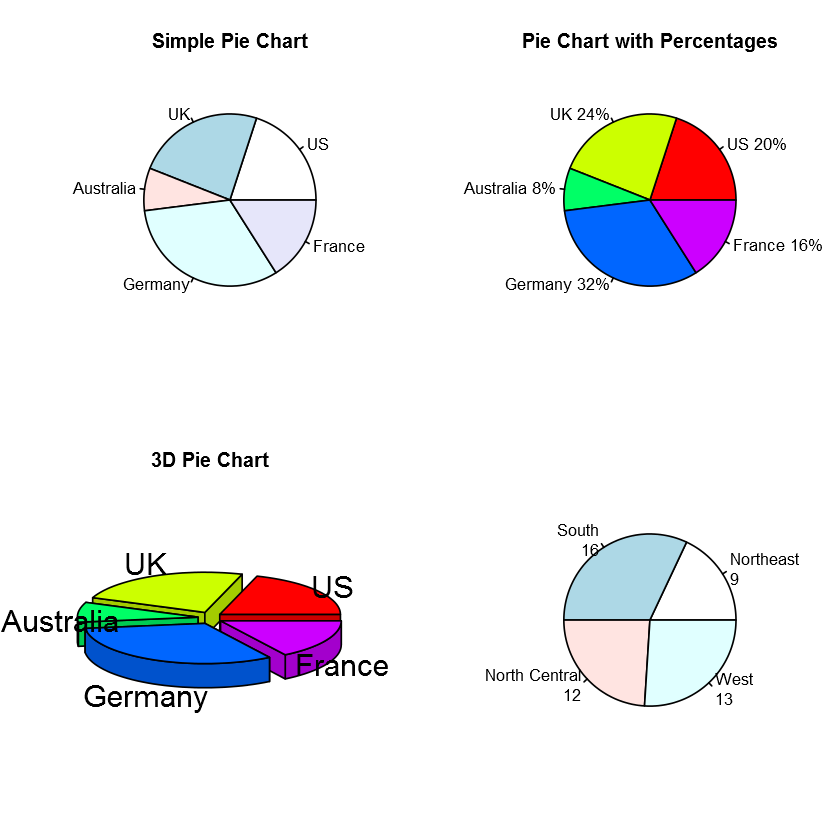

In [22]:
par(mfrow=c(2,2))  #将四幅图组合为一幅
slices <- c(10,12, 4, 16, 8)
lbls <- c("US","UK","Australia","Germany", "France")
pie(slices,labels= lbls,
   main = "Simple Pie Chart")

#为饼图添加比例数值
pct <- round(slices/sum(slices)*100)
lbls2 <- paste(lbls, " ", pct, "%" , sep="")
pie(slices, labels = lbls2, col = rainbow(length(lbls2)),
   main = "Pie Chart with Percentages")

library(plotrix)
pie3D(slices,labels=lbls, explode=0.1,
     main= "3D Pie Chart")
mytable <- table(state.region)  #从表格创建饼图
lbls3 <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels=lbls3,
   mian= "Pie Chart from a Table\n (with sample sizes)")

In [21]:
install.packages("plotrix")

Installing package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'plotrix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpuaNf28\downloaded_packages
